### 6.5 Model XGBoost (handle missing value)

In [1]:
# load basic libraries
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone/notebooks
/Users/liuyang/Desktop/Springboard_Capstone


In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.shape

(18359, 14)

In [5]:
def data_info(data):
    count = data.nunique()
    va_pct = round(count/(data.shape[0])*100,2)
    nan_p = round(data.isnull().sum()/data.shape[0]*100,2)
    frame = pd.DataFrame(zip(count,va_pct,nan_p), index=count.index, 
                         columns=['counts','unique_value_pct', 'nan_pct']).reset_index().rename(columns={'index': 'column'})
    
  
    frame['data_type']= df.dtypes.tolist()
    return frame.sort_values('counts', ascending=False)

In [6]:
def feature_en_group1(data):
    data.experience = data.experience.map(lambda x: '0' if x == '<1'
                                  else '21' if x == '>20'
                                  else x if x is not None
                                  else None).astype('float')
    
    data.last_new_job = data.last_new_job.map(lambda x: '0' if x == 'never' 
                                      else '5' if x == '>4'
                                      else x if x is not None
                                      else None).astype('float')
    
    data.relevent_experience = data.relevent_experience.map(lambda x: '0' if x=='No relevent experience'
                                                   else '1').astype('float')

    
feature_en_group1(df)

In [7]:
def feature_en_group2(data):
    
    data.company_type = data.company_type.map(lambda x: '1' if x in ['Funded Startup', 'Early Stage Startup'] 
                                      else '2' if x in ['Public Sector', 'NGO', 'Other']
                                      else '3' if x == 'Pvt Ltd'
                                      else None).astype('float')
     
    
    data.company_size = data.company_size.map(lambda x: '1' if x in ['<10','10/49','50-99'] 
                                      else '2' if x in['100-500', '500-999'] 
                                      else '3' if x in ['1000-4999', '5000-9999', '10000+']
                                      else None).astype('float')
    
feature_en_group2(df)

In [8]:
def feature_en_group3(data):
    
    data.education_level = data.education_level.map(lambda x: '1' if x in ['Primary School','High School']
                                           else '2' if x == 'Graduate'
                                           else '3' if x in ['Masters', 'Phd']
                                           else None).astype('float')
     
    
    data.major_discipline = data.major_discipline.map(lambda x: '2' if x == 'STEM' 
                                              else '1' if x in ['Humanities','Other','Business Degree', 'Arts']
                                              else 0 if x == 'No Major'
                                              else None).astype('float')
    
    data.enrolled_university = data.enrolled_university .map(lambda x: '0' if x=='no_enrollment'
                                                    else '1' if x in ['Full time course', 'Part time course']
                                                    else None).astype('float')
    
feature_en_group3(df)

In [9]:
def feature_en_group4(data):
    
    data.gender = data.gender.map(lambda x: '1' if x == 'Male' 
                         else '2' if x == 'Female'
                         else '3' if x == 'Other'
                         else None).astype('float')

feature_en_group4(df)

In [10]:
def feature_en_group6(data):
    data.city = data.city.map(lambda x: x.split('_')[1] if (df['city']==x).sum()/df.shape[0]*100 >= 1.7
                      else 'others').astype('str')

feature_en_group6(df)

In [11]:
cat_col=data_info(df)[data_info(df).data_type=='object'].column.tolist()
int_col = data_info(df)[data_info(df).data_type=='int64'].column.tolist()

df[int_col] = df[int_col].astype('float')

In [12]:
data_info(df)

,column,counts,unique_value_pct,nan_pct,data_type
0,enrollee_id,18359,100.00,0.00,float64
12,training_hours,241,1.31,0.00,float64
2,city_development_index,93,0.51,0.00,float64
8,experience,22,0.12,0.32,float64
1,city,11,0.06,0.00,object
11,last_new_job,6,0.03,2.00,float64
3,gender,3,0.02,22.32,float64
6,education_level,3,0.02,2.49,float64
7,major_discipline,3,0.02,15.46,float64
9,company_size,3,0.02,26.03,float64


In [13]:
df = pd.get_dummies(df,columns=cat_col)
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,...,city_103,city_104,city_114,city_136,city_16,city_160,city_21,city_67,city_75,city_others
0,23798.0,0.689,1.0,1.0,0.0,2.0,2.0,3.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,1
1,29166.0,0.923,1.0,1.0,0.0,2.0,2.0,14.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,46.0,0.910,NaN,1.0,0.0,2.0,2.0,6.0,1.0,2.0,...,0,0,0,0,1,0,0,0,0,0
3,18527.0,0.666,1.0,1.0,0.0,2.0,2.0,14.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
4,21751.0,0.887,NaN,0.0,0.0,3.0,2.0,8.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df = df.drop('enrollee_id',axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('target',axis=1)
y = df['target'].ravel()
X_new = X.to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X_new, y, test_size=0.30, stratify=y, random_state=43)

In [17]:
from sklearn.model_selection import KFold

In [18]:
def trainmodel_cv(model, n):
    
    cv = KFold(n_splits=n)
    for i, (train, test) in enumerate(cv.split(X_train, y_train)):
        X_train_fold, y_train_fold = X_train[train], y_train[train]
        X_test_fold, y_test_fold = X_train[test], y_train[test]
        model.fit(X_train_fold, y_train_fold)
    
    return model

In [19]:
from xgboost import XGBClassifier
import scikitplot as skplt 
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score

In [20]:
# train model with n cross validation 
# then plot lift curve and 'predicted probability' vs 'label of test data' histogram based on model prediction 
# then return model score on test data 

def liftcurve_probahisto_score(trainmethod, model, model_name, n, Xtest, ytest, ylim1, ylim2):
    
    # replace trainmethod with trainmodel_cv or trainmodel_os_cv
    final_model = trainmethod(model, n)
    
    # get prediction from test dataset
    yfinal = final_model.predict(Xtest)
    yfinal_proba = final_model.predict_proba(Xtest)[:,1]
    y_probas = final_model.predict_proba(Xtest)
    
    figure, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
    skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=y_probas, ax=ax1)
    ax1.set_ylim([0, ylim1])
    ax1.set_xlabel('Percentage of sample', fontsize=12)
    ax1.set_ylabel('Lift', fontsize=12)

    
    predProba_label = pd.DataFrame()
    #predProba_label['proba'] =(yfinal_proba - yfinal_proba.min())/(yfinal_proba.max() - yfinal_proba.min())
    predProba_label['proba'] = yfinal_proba
    predProba_label['label'] = ytest
    percent20 = round(len(ytest)*0.2)
    percent50 = round(len(ytest)*0.5)
    
    Target_in_top20pct = round(predProba_label,4).sort_values('proba', ascending=False).nlargest(percent20,'proba').label.sum()
    Target_in_top50pct = round(predProba_label,4).sort_values('proba', ascending=False).nlargest(percent50,'proba').label.sum()
    
    
    weights_1 = np.ones_like(predProba_label[predProba_label['label']==1].proba.index)/len(predProba_label[predProba_label['label']==1].proba.index)
    predProba_label[predProba_label['label']==1].proba.plot(kind='hist',
                                                                      bins=10,
                                                                      color='r',
                                                                      label='positive',
                                                                      histtype='step',
                                                                      stacked=False,
                                                                      lw=2,
                                                                      weights=weights_1,
                                                                      ax=ax2)


    weights_2 = np.ones_like(predProba_label[predProba_label['label']==0].proba.index)/len(predProba_label[predProba_label['label']==0].proba.index)
    predProba_label[predProba_label['label']==0].proba.plot(kind='hist',
                                                                     bins=10,
                                                                     label='negative',
                                                                     histtype='step',
                                                                     stacked=False,
                                                                     lw=2,
                                                                     weights=weights_2,
                                                                     ax=ax2)
    

    ax2.set_xlabel('Probability of prediction', fontsize=12)
    ax2.set_ylabel('Fraction of observation', fontsize=12)
    ax2.set_ylim([0, ylim2])
    ax2.legend()
    ax2.set_title('Predicted probability vs class',fontsize=12)
    
    #plt.suptitle(model,fontsize=12,fontweight='bold')
    precision, recall, f1score, support = score(ytest, yfinal, pos_label=1,average='binary')
    roc_auc = roc_auc_score(ytest, yfinal_proba)
    dataframe = pd.DataFrame([precision, recall, f1score, roc_auc, Target_in_top20pct, Target_in_top50pct],
                       index=['precison','recall','f1score','roc_auc', 'Target_in_top20pct', 'Target_in_top50pct'], 
                       columns=[model_name]).T
    
    return round(dataframe, 3)

,precison,recall,f1score,roc_auc,Target_in_top20pct,Target_in_top50pct
XGB,0.903,0.335,0.488,0.898,1317.0,1566.0


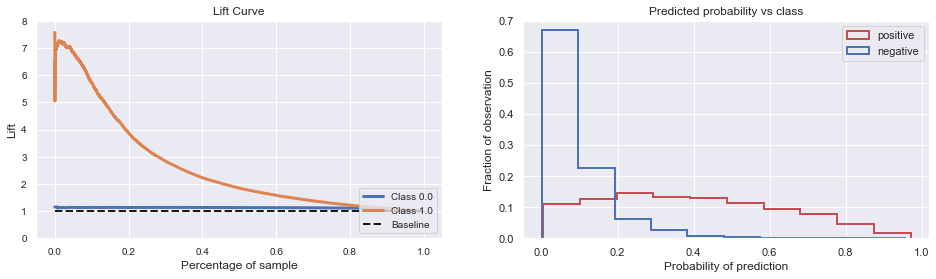

In [21]:
liftcurve_probahisto_score(trainmodel_cv, XGBClassifier(), 'XGB', 5, X_train, y_train, 8, 0.7)

,precison,recall,f1score,roc_auc,Target_in_top20pct,Target_in_top50pct
XGB,0.263,0.06,0.098,0.611,244.0,454.0


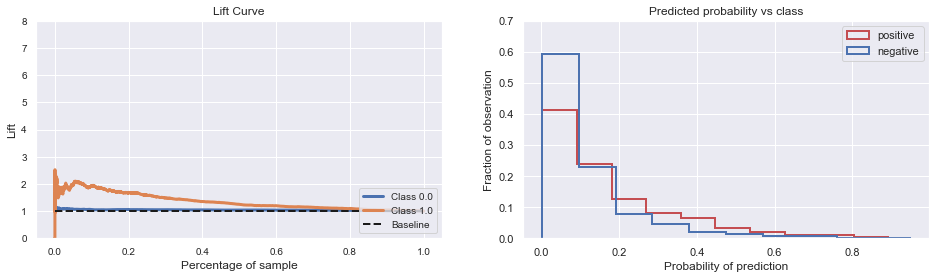

In [22]:
liftcurve_probahisto_score(trainmodel_cv, XGBClassifier(), 'XGB', 5, X_test, y_test, 8, 0.7)

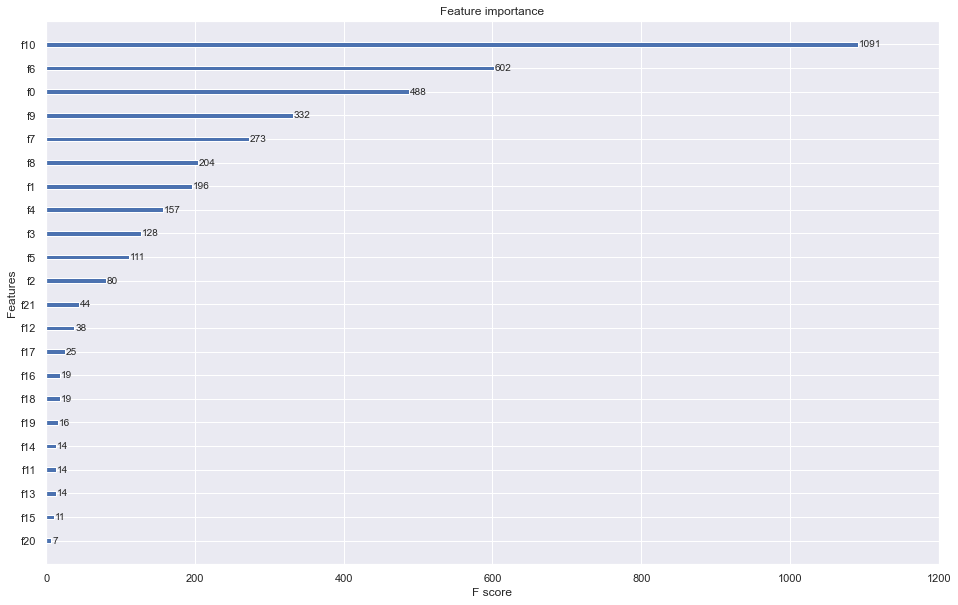

In [23]:
# feature importance for XGB
from xgboost import plot_importance
model = trainmodel_cv(XGBClassifier(), 5)
fig, ax = plt.subplots(figsize=(16, 10))
plot_importance(model,ax=ax)
plt.show()